In [1]:
pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn as sk

In [2]:
print(sk.__version__)

1.2.2


In [3]:
import torch

In [4]:
print(torch.__version__)

2.6.0+cu124


In [2]:
# ==========================
# Libraries for Data Processing and Visualization
# ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import random
import warnings
warnings.filterwarnings("ignore")

# ==========================
# Machine Learning Libraries
# ==========================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, average_precision_score, precision_recall_curve,
    confusion_matrix, roc_curve, auc
)
from collections import Counter

# ==========================
# Deep Learning Libraries (PyTorch & TensorFlow)
# ==========================
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf


2025-08-04 12:04:35.268363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754309075.532459      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754309075.607019      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')

In [4]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Data Spliting

In [7]:



X = df.drop('Class', axis=1)
y = df['Class']

# Use train_test_split for splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the Distribution of the labels
print('-' * 100)
print('Original dataset shape %s' % Counter(y))
print('Training dataset shape %s' % Counter(y_train))
print('Testing dataset shape %s' % Counter(y_test))

# Turn into an array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

original_Xtrain = X_train
original_Xtest = X_test
original_ytrain = y_train
original_ytest = y_test

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label / len(y_train))
print(test_counts_label / len(y_test))

----------------------------------------------------------------------------------------------------
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 227451, 1: 394})
Testing dataset shape Counter({0: 56864, 1: 98})
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [8]:
# Ensure NumPy arrays
X_train_np = original_Xtrain
y_train_np = original_ytrain
X_test_np = original_Xtest
y_test_np = original_ytest

# Without SMOTE


Model training took 10.64 seconds

--- Validation Evaluation ---
Accuracy:   0.9991
F1 Score:   0.7111
Precision:  0.8571
Recall:     0.6076
ROC-AUC:    0.8668

Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     45490
       Fraud       0.86      0.61      0.71        79

    accuracy                           1.00     45569
   macro avg       0.93      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569



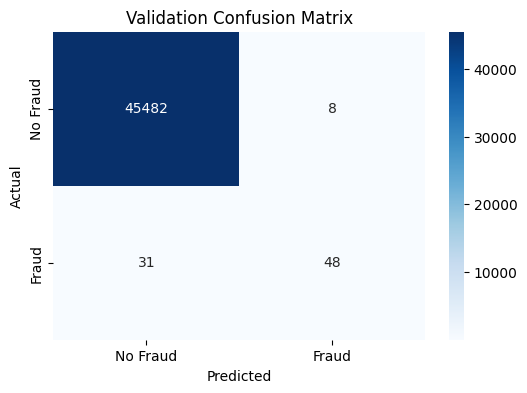

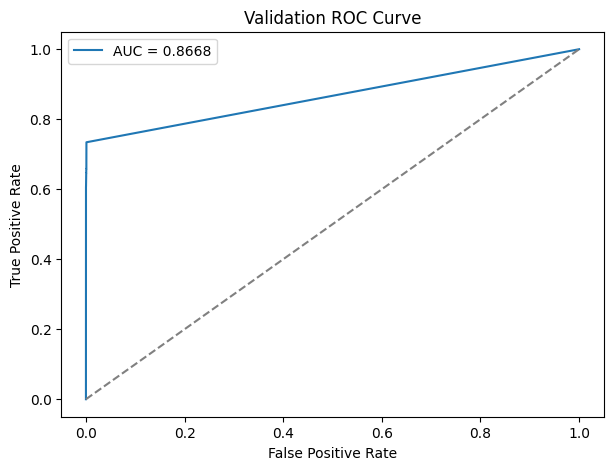

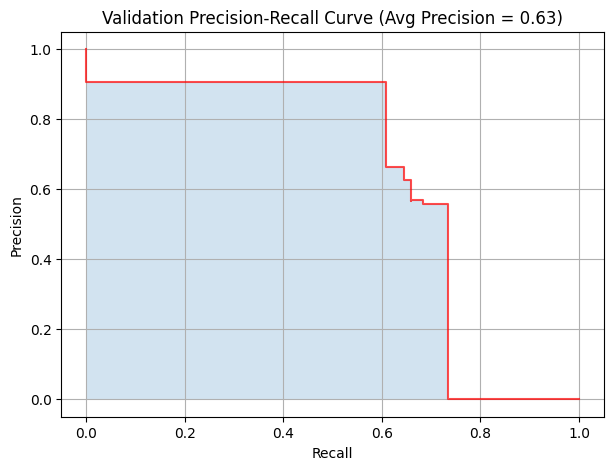


--- Final Test Evaluation ---
Accuracy:   0.9994
F1 Score:   0.7956
Precision:  0.8675
Recall:     0.7347
ROC-AUC:    0.8978

Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.87      0.73      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



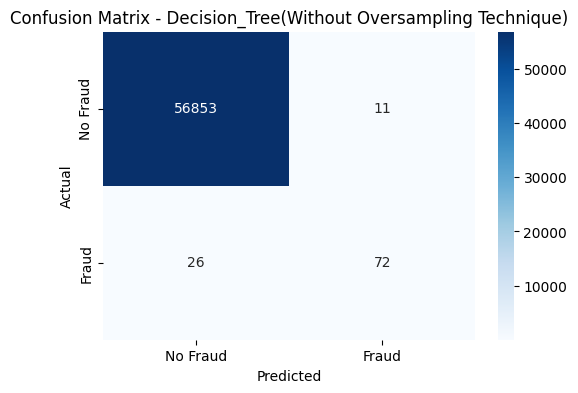

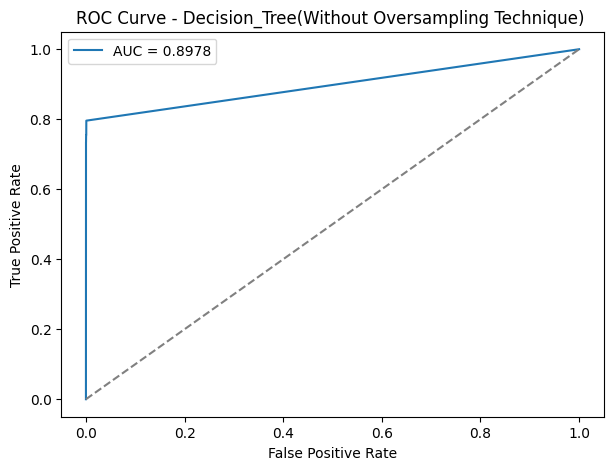

In [9]:


# Dataset Split (80% Train / 20% Validation) 
X_train_main, X_val, y_train_main, y_val = train_test_split(
    original_Xtrain, original_ytrain, test_size=0.2, random_state=42, stratify=original_ytrain
)

X_test_np = original_Xtest
y_test_np = original_ytest

# 2. Train Decision Tree on Training Set 
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

start = time.time()
dt_model.fit(X_train_main, y_train_main)
end = time.time()
print(f"\nModel training took {end - start:.2f} seconds")

# --- 3. Validation Evaluation ---
val_probs = dt_model.predict_proba(X_val)[:, 1]
val_preds = (val_probs > 0.5).astype(int)

print("\n--- Validation Evaluation ---")
print(f"Accuracy:   {accuracy_score(y_val, val_preds):.4f}")
print(f"F1 Score:   {f1_score(y_val, val_preds):.4f}")
print(f"Precision:  {precision_score(y_val, val_preds):.4f}")
print(f"Recall:     {recall_score(y_val, val_preds):.4f}")
print(f"ROC-AUC:    {roc_auc_score(y_val, val_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_val, val_preds, target_names=["No Fraud", "Fraud"]))

# --- Confusion Matrix (Validation) ---
cm_val = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve (Validation) ---
fpr, tpr, _ = roc_curve(y_val, val_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.show()

# --- Precision-Recall Curve (Validation) ---
average_precision = average_precision_score(y_val, val_probs)
precision, recall, _ = precision_recall_curve(y_val, val_probs)
plt.figure(figsize=(7, 5))
plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Validation Precision-Recall Curve (Avg Precision = {average_precision:.2f})')
plt.grid(True)
plt.show()

# --- 4. Final Test Evaluation ---
test_probs = dt_model.predict_proba(X_test_np)[:, 1]
test_preds = (test_probs > 0.5).astype(int)

print("\n--- Final Test Evaluation ---")
print(f"Accuracy:   {accuracy_score(y_test_np, test_preds):.4f}")
print(f"F1 Score:   {f1_score(y_test_np, test_preds):.4f}")
print(f"Precision:  {precision_score(y_test_np, test_preds):.4f}")
print(f"Recall:     {recall_score(y_test_np, test_preds):.4f}")
print(f"ROC-AUC:    {roc_auc_score(y_test_np, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_np, test_preds, target_names=["No Fraud", "Fraud"]))

# --- Confusion Matrix (Test) ---
cm_test = confusion_matrix(y_test_np, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix - Decision_Tree(Without Oversampling Technique)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion_Matrix_decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

# --- ROC Curve (Test) ---
fpr, tpr, _ = roc_curve(y_test_np, test_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision_Tree(Without Oversampling Technique) ")
plt.legend()
plt.savefig("roc_curve_decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

# # --- Precision-Recall Curve (Test) ---
# average_precision_test = average_precision_score(y_test_np, test_probs)
# precision_test, recall_test, _ = precision_recall_curve(y_test_np, test_probs)
# plt.figure(figsize=(7, 5))
# plt.step(recall_test, precision_test, color='r', alpha=0.7, where='post')
# plt.fill_between(recall_test, precision_test, step='post', alpha=0.2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Test Precision-Recall Curve (Avg Precision = {average_precision_test:.2f})')
# plt.grid(True)
# plt.show()


# Oversampling Using Smote 


--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

--- Cross-Validation Results ---
Accuracy:  0.9978
Precision: 0.4391
Recall:    0.7792
F1 Score:  0.5589
AUC:       0.8938

Final model training took 34.81 seconds

--- Final Test Evaluation ---
Accuracy:   0.9976
F1 Score:   0.5356
Precision:  0.4010
Recall:     0.8061
ROC-AUC:    0.9071

Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.40      0.81      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



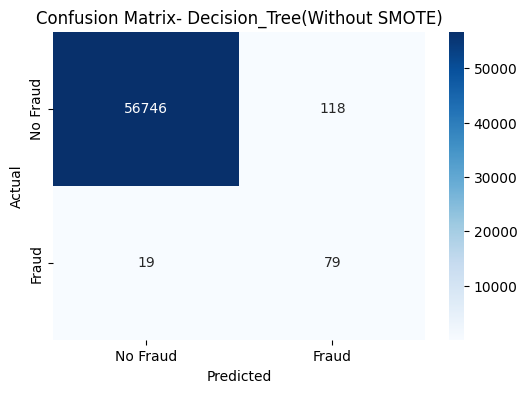

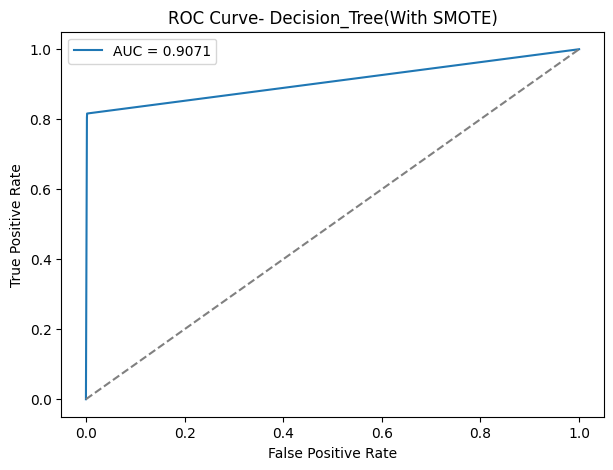

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, average_precision_score, precision_recall_curve,
    confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Ensure inputs are numpy arrays
X_train_np = original_Xtrain
y_train_np = original_ytrain
X_test_np = original_Xtest
y_test_np = original_ytest

# --- Cross-Validation with SMOTE ---
accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), start=1):
    print(f"\n--- Fold {fold} ---")

    # Split folds
    X_train_fold, y_train_fold = X_train_np[train_idx], y_train_np[train_idx]
    X_val_fold, y_val_fold = X_train_np[val_idx], y_train_np[val_idx]

    # Apply SMOTE on training fold
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)

    # Train Decision Tree with best parameters
    dt_model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        random_state=42
    )
    dt_model.fit(X_train_res, y_train_res)

    # Predict on validation set
    val_probs = dt_model.predict_proba(X_val_fold)[:, 1]
    val_preds = (val_probs > 0.5).astype(int)

    # Metrics
    accuracy_lst.append(accuracy_score(y_val_fold, val_preds))
    precision_lst.append(precision_score(y_val_fold, val_preds))
    recall_lst.append(recall_score(y_val_fold, val_preds))
    f1_lst.append(f1_score(y_val_fold, val_preds))
    auc_lst.append(roc_auc_score(y_val_fold, val_probs))

# --- Cross-Validation Summary ---
print("\n--- Cross-Validation Results ---")
print(f"Accuracy:  {np.mean(accuracy_lst):.4f}")
print(f"Precision: {np.mean(precision_lst):.4f}")
print(f"Recall:    {np.mean(recall_lst):.4f}")
print(f"F1 Score:  {np.mean(f1_lst):.4f}")
print(f"AUC:       {np.mean(auc_lst):.4f}")

# --- Final Training on Full SMOTE Data ---
Xsm_train, ysm_train = SMOTE(random_state=42).fit_resample(X_train_np, y_train_np)
dt_final = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

start = time.time()
dt_final.fit(Xsm_train, ysm_train)
end = time.time()
print(f"\nFinal model training took {end - start:.2f} seconds")

# --- Final Test Evaluation ---
test_probs = dt_final.predict_proba(X_test_np)[:, 1]
test_preds = (test_probs > 0.5).astype(int)

print("\n--- Final Test Evaluation ---")
print(f"Accuracy:   {accuracy_score(y_test_np, test_preds):.4f}")
print(f"F1 Score:   {f1_score(y_test_np, test_preds):.4f}")
print(f"Precision:  {precision_score(y_test_np, test_preds):.4f}")
print(f"Recall:     {recall_score(y_test_np, test_preds):.4f}")
print(f"ROC-AUC:    {roc_auc_score(y_test_np, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_np, test_preds, target_names=["No Fraud", "Fraud"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_np, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix- Decision_Tree(Without SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion_Matrix_decision_tree(Smote).png", dpi=300, bbox_inches='tight')
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test_np, test_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve- Decision_Tree(With SMOTE)")
plt.legend()
plt.savefig("roc_curve_decision_tree(Smote).png", dpi=300, bbox_inches='tight')
plt.show()

# # --- Precision-Recall Curve ---
# average_precision = average_precision_score(y_test_np, test_probs)
# precision, recall, _ = precision_recall_curve(y_test_np, test_probs)
# plt.figure(figsize=(7, 5))
# plt.step(recall, precision, color='r', alpha=0.7, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Precision-Recall Curve (Avg Precision = {average_precision:.2f})')
# plt.grid(True)
# plt.show()


# with SVMSMOTE 

In [11]:

# Ensure inputs are numpy arrays
X_train_np = original_Xtrain
y_train_np = original_ytrain
X_test_np = original_Xtest
y_test_np = original_ytest

# --- Cross-Validation with SVMSMOTE ---
accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), start=1):
    print(f"\n--- Fold {fold} ---")

    # Split folds
    X_train_fold, y_train_fold = X_train_np[train_idx], y_train_np[train_idx]
    X_val_fold, y_val_fold = X_train_np[val_idx], y_train_np[val_idx]

    # ✅ Apply SVMSMOTE on training fold
    sm = SVMSMOTE(random_state=42, k_neighbors=5, m_neighbors=10)
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)

    # Train Decision Tree with best parameters
    dt_model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        random_state=42
    )
    dt_model.fit(X_train_res, y_train_res)

    # Predict on validation set
    val_probs = dt_model.predict_proba(X_val_fold)[:, 1]
    val_preds = (val_probs > 0.5).astype(int)

    # Metrics
    accuracy_lst.append(accuracy_score(y_val_fold, val_preds))
    precision_lst.append(precision_score(y_val_fold, val_preds))
    recall_lst.append(recall_score(y_val_fold, val_preds))
    f1_lst.append(f1_score(y_val_fold, val_preds))
    auc_lst.append(roc_auc_score(y_val_fold, val_probs))

# --- Cross-Validation Summary ---
print("\n--- Cross-Validation Results ---")
print(f"Accuracy:  {np.mean(accuracy_lst):.4f}")
print(f"Precision: {np.mean(precision_lst):.4f}")
print(f"Recall:    {np.mean(recall_lst):.4f}")
print(f"F1 Score:  {np.mean(f1_lst):.4f}")
print(f"AUC:       {np.mean(auc_lst):.4f}")

# --- Final Training on Full SVMSMOTE Data ---
Xsm_train, ysm_train = SVMSMOTE(random_state=42, k_neighbors=5, m_neighbors=10).fit_resample(X_train_np, y_train_np)
dt_final = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

start = time.time()
dt_final.fit(Xsm_train, ysm_train)
end = time.time()
print(f"\nFinal model training took {end - start:.2f} seconds")







--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

--- Cross-Validation Results ---
Accuracy:  0.9992
Precision: 0.7522
Recall:    0.8097
F1 Score:  0.7785
AUC:       0.9122

Final model training took 37.06 seconds


In [12]:
# --- Final Test Evaluation ---
test_probs = dt_final.predict_proba(X_test_np)[:, 1]
test_preds = (test_probs > 0.5).astype(int)

print("\n--- Final Test Evaluation ---")
print(f"Accuracy:   {accuracy_score(y_test_np, test_preds):.4f}")
print(f"F1 Score:   {f1_score(y_test_np, test_preds):.4f}")
print(f"Precision:  {precision_score(y_test_np, test_preds):.4f}")
print(f"Recall:     {recall_score(y_test_np, test_preds):.4f}")
print(f"ROC-AUC:    {roc_auc_score(y_test_np, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_np, test_preds, target_names=["No Fraud", "Fraud"]))



--- Final Test Evaluation ---
Accuracy:   0.9989
F1 Score:   0.7215
Precision:  0.6529
Recall:     0.8061
ROC-AUC:    0.9180

Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.65      0.81      0.72        98

    accuracy                           1.00     56962
   macro avg       0.83      0.90      0.86     56962
weighted avg       1.00      1.00      1.00     56962



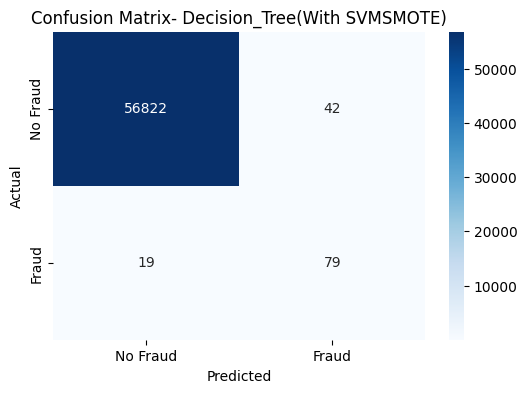

In [13]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test_np, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix- Decision_Tree(With SVMSMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion_Matrix_decision_tree(SVMSMOTE).png", dpi=300, bbox_inches='tight')
plt.show()

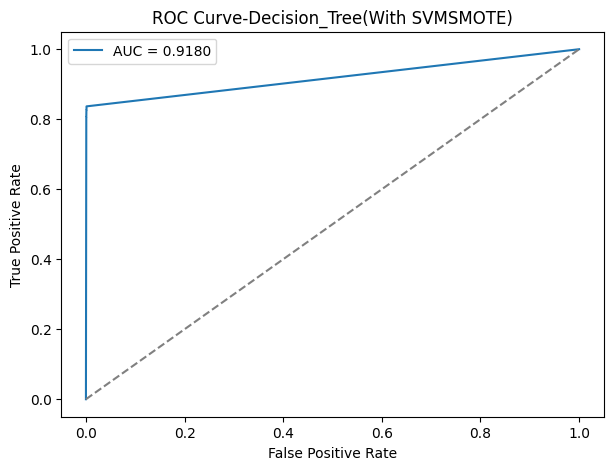

In [14]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test_np, test_probs)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve-Decision_Tree(With SVMSMOTE)")
plt.legend()
plt.savefig("roc_curve_decision_tree(SVMSMOTE).png", dpi=300, bbox_inches='tight')
plt.show()

